In [1]:
pip install matplotlib seaborn plotly pandas numpy squarify


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import squarify


In [7]:
from google.colab import files
uploaded = files.upload()



Saving pakistan_air_quality_final_clean.csv to pakistan_air_quality_final_clean.csv


In [8]:
import pandas as pd

df = pd.read_csv("pakistan_air_quality_final_clean.csv")
df.head()


,timestamp,city,latitude,longitude,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,...,pressure,date,hour,day_of_week,month,month_name,year,is_weekend,season,aqi_category
0,2025-11-06 00:00:00,Faisalabad,31.4504,73.135,23.7,22.6,598.0,15.9,5.0,58.0,...,1023.4,2025-11-06,0,Thursday,11,November,2025,0,Autumn,Moderate
1,2025-11-06 01:00:00,Faisalabad,31.4504,73.135,25.4,24.2,790.0,21.7,5.6,51.0,...,1023.4,2025-11-06,1,Thursday,11,November,2025,0,Autumn,Moderate
2,2025-11-06 02:00:00,Faisalabad,31.4504,73.135,32.2,30.7,1048.0,29.4,6.5,42.0,...,1023.4,2025-11-06,2,Thursday,11,November,2025,0,Autumn,Moderate
3,2025-11-06 03:00:00,Faisalabad,31.4504,73.135,36.2,34.8,1176.0,33.2,7.2,42.0,...,1023.4,2025-11-06,3,Thursday,11,November,2025,0,Autumn,Moderate
4,2025-11-06 04:00:00,Faisalabad,31.4504,73.135,34.7,33.3,1053.0,29.3,7.6,58.0,...,1023.4,2025-11-06,4,Thursday,11,November,2025,0,Autumn,Moderate


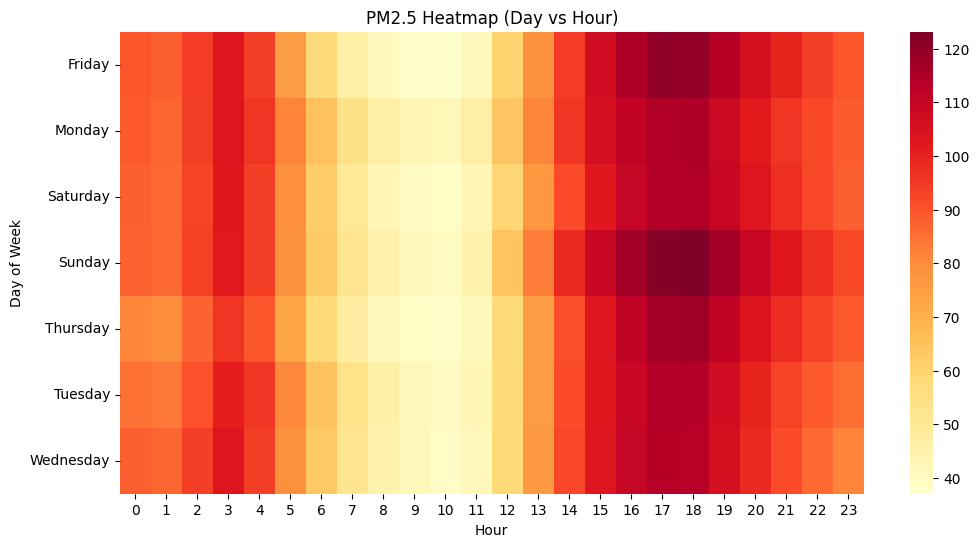

In [11]:
# Create pivot table
heat_data = df.pivot_table(values='pm2_5',
                            index='day_of_week',
                            columns='hour',
                            aggfunc='mean')

plt.figure(figsize=(12,6))
sns.heatmap(heat_data, cmap="YlOrRd", annot=False)
plt.title("PM2.5 Heatmap (Day vs Hour)")
plt.xlabel("Hour")
plt.ylabel("Day of Week")
plt.show()


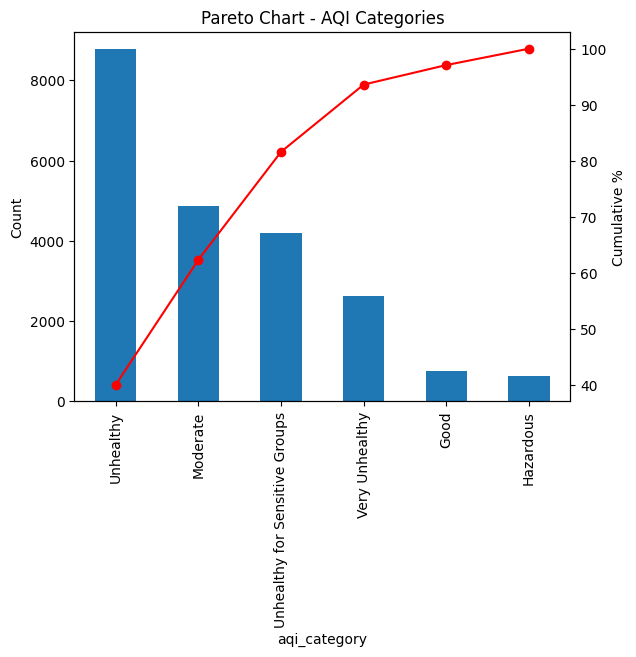

In [12]:
# Count AQI categories
aqi_counts = df['aqi_category'].value_counts().sort_values(ascending=False)

# Calculate cumulative %
cumulative = aqi_counts.cumsum() / aqi_counts.sum() * 100

fig, ax1 = plt.subplots()

# Bar chart
aqi_counts.plot(kind='bar', ax=ax1)
ax1.set_ylabel("Count")

# Line chart
ax2 = ax1.twinx()
ax2.plot(cumulative, color='red', marker='o')
ax2.set_ylabel("Cumulative %")

plt.title("Pareto Chart - AQI Categories")
plt.show()


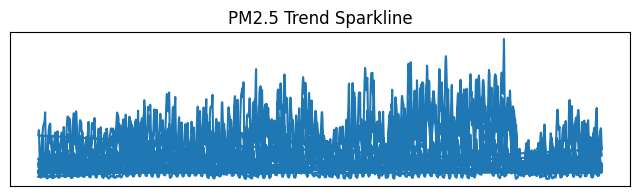

In [13]:
plt.figure(figsize=(8,2))
plt.plot(df['timestamp'], df['pm2_5'])
plt.xticks([])
plt.yticks([])
plt.title("PM2.5 Trend Sparkline")
plt.show()


In [14]:
latest_value = df['pm2_5'].iloc[-1]

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=latest_value,
    title={'text': "Current PM2.5 Level"},
    gauge={
        'axis': {'range': [0, 300]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "green"},
            {'range': [50, 100], 'color': "yellow"},
            {'range': [100, 200], 'color': "orange"},
            {'range': [200, 300], 'color': "red"}
        ]
    }
))

fig.show()


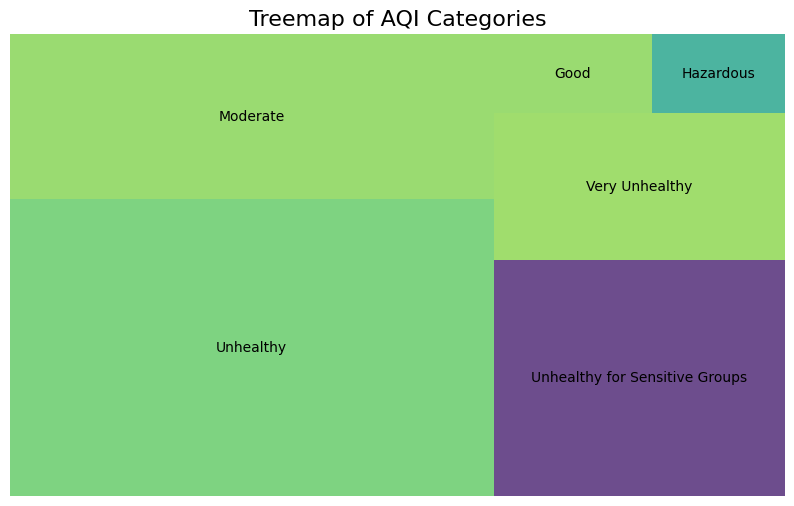

In [15]:
import squarify

# Count AQI categories
aqi_counts = df['aqi_category'].value_counts()

plt.figure(figsize=(10,6))
squarify.plot(
    sizes=aqi_counts.values,
    label=aqi_counts.index,
    alpha=0.8
)

plt.title("Treemap of AQI Categories", fontsize=16)
plt.axis("off")
plt.show()


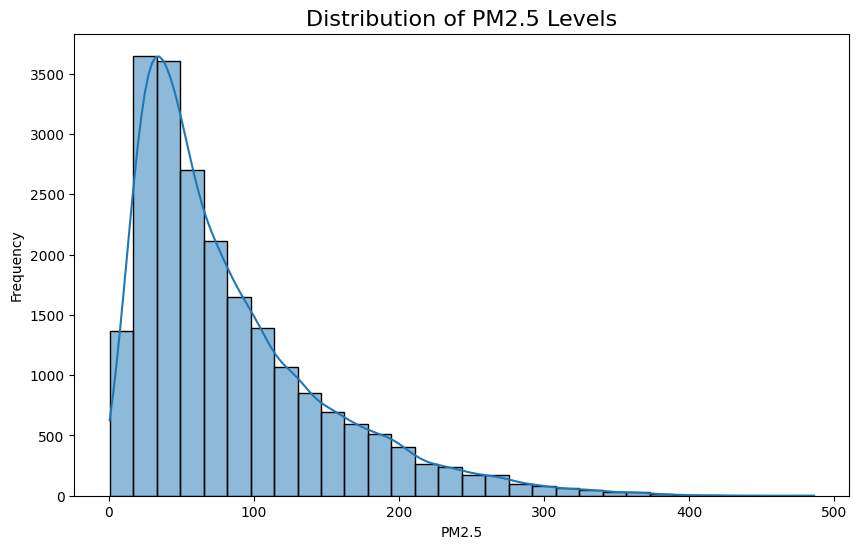

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(df['pm2_5'], bins=30, kde=True)

plt.title("Distribution of PM2.5 Levels", fontsize=16)
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.show()


In [17]:
# Order categories manually
severity_order = [
    "Moderate",
    "Unhealthy for Sensitive Groups",
    "Unhealthy",
    "Very Unhealthy"
]

funnel_data = df['aqi_category'].value_counts().reindex(severity_order)

fig = go.Figure(go.Funnel(
    y = funnel_data.index,
    x = funnel_data.values,
    textinfo = "value+percent initial"
))

fig.update_layout(title="Air Quality Severity Funnel")

fig.show()


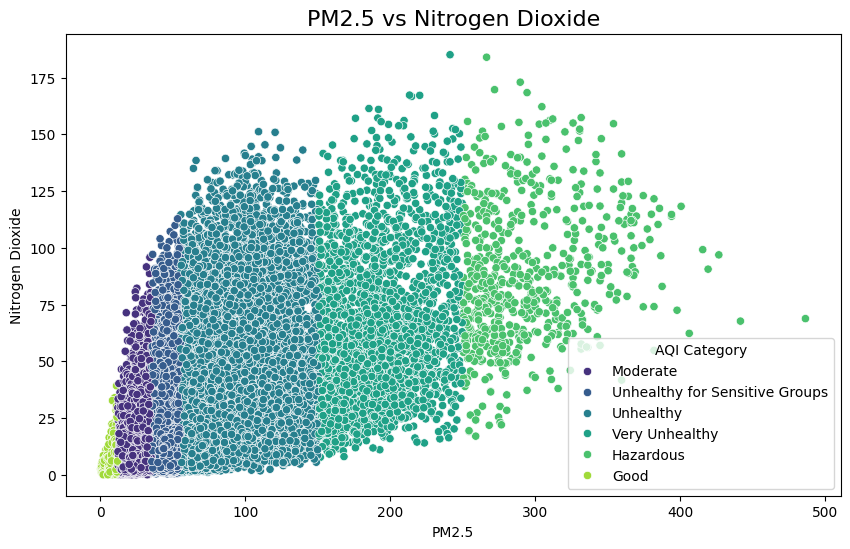

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df['pm2_5'],
    y=df['nitrogen_dioxide'],
    hue=df['aqi_category'],
    palette="viridis"
)

plt.title("PM2.5 vs Nitrogen Dioxide", fontsize=16)
plt.xlabel("PM2.5")
plt.ylabel("Nitrogen Dioxide")
plt.legend(title="AQI Category")
plt.show()


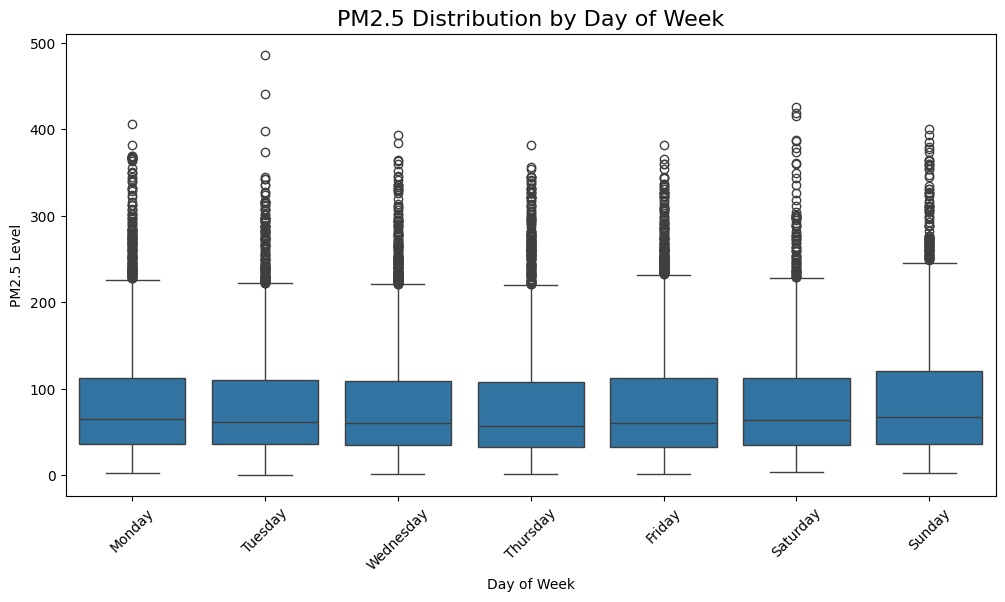

In [19]:
plt.figure(figsize=(12,6))

sns.boxplot(
    x='day_of_week',
    y='pm2_5',
    data=df,
    order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
)

plt.title("PM2.5 Distribution by Day of Week", fontsize=16)
plt.xlabel("Day of Week")
plt.ylabel("PM2.5 Level")
plt.xticks(rotation=45)
plt.show()


In [20]:
fig = px.sunburst(
    df,
    path=['season', 'aqi_category'],
    values=None
)

fig.update_layout(title="Air Quality Distribution by Season and Category")

fig.show()


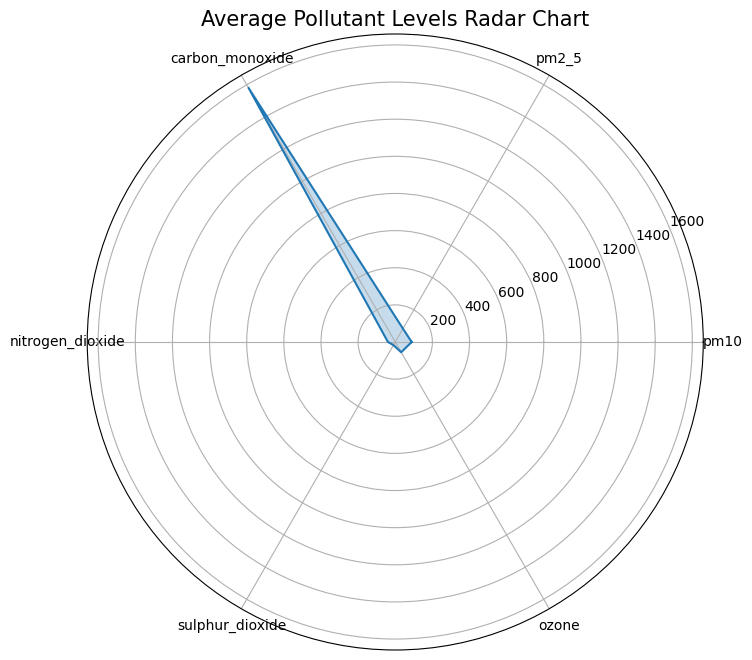

In [21]:
pollutants = ['pm10', 'pm2_5', 'carbon_monoxide',
              'nitrogen_dioxide', 'sulphur_dioxide', 'ozone']

avg_values = df[pollutants].mean().values

# Close the radar chart
values = np.append(avg_values, avg_values[0])
angles = np.linspace(0, 2 * np.pi, len(pollutants), endpoint=False)
angles = np.append(angles, angles[0])

fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

ax.plot(angles, values)
ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(pollutants)

plt.title("Average Pollutant Levels Radar Chart", size=15)
plt.show()


In [22]:
total = len(df)
very_unhealthy = len(df[df['aqi_category'] == "Very Unhealthy"])

percentage = (very_unhealthy / total) * 100

fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=percentage,
    title={'text': "Very Unhealthy Percentage"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 25], 'color': "green"},
            {'range': [25, 50], 'color': "yellow"},
            {'range': [50, 75], 'color': "orange"},
            {'range': [75, 100], 'color': "red"}
        ]
    }
))

fig.show()
